<a href="https://colab.research.google.com/github/UCREL/pymusas_notebook/blob/main/PyMUSAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tag Text

In this guide we are going to show you how to tag text using the PyMUSAS RuleBasedTagger so that you can extract token level USAS semantic tags from the tagged text. The guide is broken down into different languages, for each guide we are going to:

1. Download the relevant pre-configured PyMUSAS RuleBasedTagger spaCy component for the language.
2. Download and use a Natural Language Processing (NLP) pipeline that will tokenise, lemmatise, and Part Of Speech (POS) tag. In most cases this will be a spaCy pipeline. Note that the PyMUSAS RuleBasedTagger only requires at minimum the data to be tokenised but having the lemma and POS tag will improve the accuracy of the tagging of the text.
3. Run the PyMUSAS RuleBasedTagger.
4. Extract token level linguistic information from the tagged text, which will include USAS semantic tags.
5. For Chinese, Italian, Portuguese, Spanish, Welsh, and English taggers which support Multi Word Expression (MWE) identification and tagging we will show how to extract this information from the tagged text as well.

### Tagging English text (single sentence)

**Note** for guides on tagging text in other languages please see the PyMUSAS how to guide which can be found at this [link.](https://ucrel.github.io/pymusas/usage/how_to/tag_text)

First download both the English PyMUSAS RuleBasedTagger spaCy component and the small English spaCy model:

First we need to download the English PyMUSAS RuleBasedTagger spaCy component which will require using `pip install` to install the required package.  

In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install https://github.com/UCREL/pymusas-models/releases/download/en_dual_none_contextual-0.3.3/en_dual_none_contextual-0.3.3-py3-none-any.whl


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 902.0/902.0 kB 11.3 MB/s eta 0:00:00


Now we need to install the small English spaCy model:

In [2]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 46.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Now that the modules we need are installed we can create the tagger:

First we need to import spaCy:

In [3]:
import spacy

Then we need to exclude some parts of spacy as we do not need then

In [4]:
nlp = spacy.load('en_core_web_sm', exclude=['parser', 'ner'])

We then need to load the English PyMUSAS rule based tagger in a separate spaCy pipeline

In [5]:
english_tagger_pipeline = spacy.load('en_dual_none_contextual')

Notice here that we load "en_dual_none_contextual" which matches the name of the pymusas-model that we downloaded earlier.  

We can now add the English PyMUSAS rule based tagger to the main spaCy pipeline as so:

In [6]:
nlp.add_pipe('pymusas_rule_based_tagger', source=english_tagger_pipeline)

The tagger is now setup for tagging text through the spaCy pipeline like so (this example follows on from the last). The example text is taken from the English Wikipedia page on the topic of The Nile River, we captilised the n in Northeastern.

We will first need to create a sting holding our text and assign it to a variable (`text`).   We then pass this to the spaCy tagger and save the output as (`output_doc`):

In [7]:
text = "The Nile is a major north-flowing river in Northeastern Africa."

output_doc = nlp(text)

We have now tagged all the text, but will need to display it.  Each part of the text is a token stored in `output_doc`.  Each token has attributes such as the lemma or POS.  To get all this information we will loop over `output_doc` and print a small table to screen.

In [8]:
print(f'Text\tLemma\tPOS\tUSAS Tags')
for token in output_doc:
    print(f'{token.text}\t{token.lemma_}\t{token.pos_}\t{token._.pymusas_tags}')

Text	Lemma	POS	USAS Tags
The	the	DET	['Z5']
Nile	Nile	PROPN	['Z2']
is	be	AUX	['A3+', 'Z5']
a	a	DET	['Z5']
major	major	ADJ	['A11.1+', 'N3.2+']
north	north	NOUN	['M6']
-	-	PUNCT	['PUNCT']
flowing	flow	VERB	['M4', 'M1']
river	river	NOUN	['W3/M4', 'N5+']
in	in	ADP	['Z5']
Northeastern	Northeastern	PROPN	['Z1mf', 'Z3c']
Africa	Africa	PROPN	['Z1mf', 'Z3c']
.	.	PUNCT	['PUNCT']


In some languages such as English, the tagger can also identify and tag Multi Word Expressions (MWE).  We can see these, in much the same way as the single words above:

In [9]:
print(f'Text\tPOS\tMWE start and end index\tUSAS Tags')

for token in output_doc:
    start, end = token._.pymusas_mwe_indexes[0]
    if (end - start) > 1:
        print(f'{token.text}\t{token.pos_}\t{(start, end)}\t{token._.pymusas_tags}')

Text	POS	MWE start and end index	USAS Tags
Northeastern	PROPN	(10, 12)	['Z1mf', 'Z3c']
Africa	PROPN	(10, 12)	['Z1mf', 'Z3c']


## Reading from a file

Reading from a file is much the same as for a string of text like we did above:

In [10]:
from pathlib import Path

nile_file = Path("Nile.txt")
if not nile_file.exists():
  print('Cannot found the Nile text file, downloading the file')
  import requests
  response = requests.get("https://raw.githubusercontent.com/UCREL/pymusas_notebook/refs/heads/main/Nile.txt")
  with nile_file.open('w', encoding='utf-8') as nile_fp:
    nile_fp.write(response.text)
  print('Nile text file downloaded')

with nile_file.open("r", encoding="utf-8") as nile_fp:
    nile_text = nile_fp.read()
    output_doc = nlp(nile_text)
    for token in output_doc:
        print(f'{token.text}\t{token.lemma_}\t{token.pos_}\t{token._.pymusas_tags}')


The	the	DET	['Z5']
Nile	Nile	PROPN	['Z2']
is	be	AUX	['A3+', 'Z5']
a	a	DET	['Z5']
major	major	ADJ	['A11.1+', 'N3.2+']
north	north	NOUN	['M6']
-	-	PUNCT	['PUNCT']
flowing	flow	VERB	['M4', 'M1']
river	river	NOUN	['W3/M4', 'N5+']
in	in	ADP	['Z5']
northeastern	northeastern	ADJ	['T1.3']
Africa	Africa	PROPN	['T1.3']
.	.	PUNCT	['PUNCT']
It	it	PRON	['Z8']
flows	flow	VERB	['M4', 'M1']
into	into	ADP	['Z5']
the	the	DET	['Z5']
Mediterranean	Mediterranean	PROPN	['Z1mf', 'Z3c']
Sea	Sea	PROPN	['Z1mf', 'Z3c']
.	.	PUNCT	['PUNCT']
The	the	DET	['Z5']
Nile	Nile	PROPN	['Z2']
is	be	AUX	['A3+', 'Z5']
the	the	DET	['Z5']
longest	long	ADJ	['T1.3+++', 'N3.7+++', 'N3.3+++', 'N3.2+++']
river	river	NOUN	['W3/M4', 'N5+']
in	in	ADP	['Z5']
Africa	Africa	PROPN	['Z2']
and	and	CCONJ	['Z5']
has	have	AUX	['A9+', 'Z5', 'A2.2', 'S4']
historically	historically	ADV	['T1.1.1']
been	be	AUX	['A3+', 'Z5']
considered	consider	VERB	['X2.1', 'X2.4', 'X6']
the	the	DET	['Z5']
longest	long	ADJ	['T1.3+++', 'N3.7+++', 'N3.3+++', 'N3.2+++']

## Using Pandas for easier reading of the output

As the input gets larger, it will be easier to read it in from a file and output the results in a [Pandas](https://pandas.pydata.org/) DataFrame, which can be used in a similar way to a spreadsheet or table.

As we need Pandas, we will first need to ensure that pandas is installed:

In [11]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install pandas

In [12]:
# load in pandas so we can create dataframs
import pandas as pd

# We need to create lists for each of the columns
text = []
lemma = []
pos = []
pymusas_tags = []

# Now we need to open the file
with open('Nile.txt') as f:
    contents = f.read()

    # We need to pass the contents of the file to the tagger
    output_doc = nlp(contents)

    # We need to loop over the output of the tagger and
    # and add each element to the lists
    for token in output_doc:
        text.append(token.text)
        lemma.append(token.lemma_)
        pos.append(token.pos_)
        pymusas_tags.append(token._.pymusas_tags)


# We need to create the dataframe with the columns we will require.
# and assign each list to a column
df = pd.DataFrame({'Text': text,
                   'Lemma': lemma,
                   'POS': pos,
                   'USAS_Tags': pymusas_tags
                  })

# Print out the dataframe so we can see it.
# We should use 'print(df)' but 'df' displays
# better in Jupyter:

df

,Text,Lemma,POS,USAS_Tags
0,The,the,DET,[Z5]
1,Nile,Nile,PROPN,[Z2]
2,is,be,AUX,"[A3+, Z5]"
3,a,a,DET,[Z5]
4,major,major,ADJ,"[A11.1+, N3.2+]"
...,...,...,...,...
380,the,the,DET,[Z5]
381,largest,large,ADJ,"[N3.2+++, N5+++, A11.1+++]"
382,water,water,NOUN,"[O1.2, W3/M4, B1, C1%]"
383,discharge,discharge,NOUN,"[A1.7-/M1, B1, O1.2]"


## Tagging text inline

One option we can place tags along side the text.

In this example we place the POS tag alongside any text that is tagged as either a Noun (`NOUN`) or a Proper Noun (`PROPN`).

In [13]:
# We need to import a library that can display the text as HTML
# so that we can mark it up as we want
from IPython.display import HTML

# Read in the text and store it as a variable
example_text =  open('Nile.txt').read()

# Pass the text through the tagger
tagged_text = nlp(example_text)


# We need to create a function that can take a token as input
# and change its background colour, and add a tag type next to it.
def mark_up(token, tags = None):
    colours = [
    "134,153,120",
    "127,170,190",
    "194,103,99",
    "227,203,139",
    "225,171,108",
    ]
    colour_lookup = dict(zip(tags, colours))

    if token.pos_ in tags:
        begin_bkgr = f'<bgr class="entity" style="background:rgb({colour_lookup[token.pos_]}) ; padding: 0.1em 0.1em; margin: 0 0.15em; border-radius: 0.23em;">'
        end_bkgr = '\n</bgr>'
        begin_span = '<span style="font-size: 0.8em; font-weight: bold; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">'
        end_span = '\n</span>'
        return f"{begin_bkgr}{token}{begin_span}{token.pos_}{end_span}{end_bkgr}"
    if token.pos_ == "PUNCT":
        return f"{token.text}"
    return f" {token.text}"


# This function loops over the text, passes each word to the "markup" function
# and then displays them all together
def visualize(tagged_text, tags = None):
    start_div = f'<div class="entities" style="line-height: 2.0; direction: ltr">'
    end_div = '\n</div>'
    html = start_div
    for token in tagged_text:
        html += mark_up(token, tags)
    html += end_div
    return HTML(html)

visualize(tagged_text, ["NOUN", "PROPN"])

## Histograms of Part Of Speech frequency

To create plots in python we need a package called matplotlib.  We need to install this first.

In [14]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install matplotlib

<Axes: xlabel='POS'>

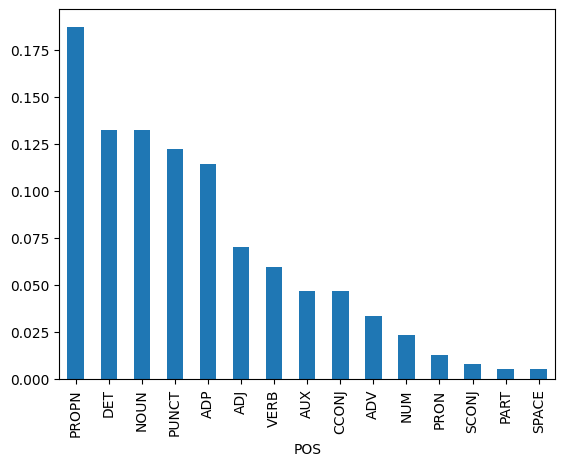

In [15]:
# we need to load in the plotting and dataframes library
import matplotlib.pyplot as plt
import pandas

# create the plot
data = df
fig, ax = plt.subplots()

# Extract the column we need, "POS", and count how many times each
# POS appears, and normalise the values
data['POS'].value_counts(normalize=True).plot(ax=ax, kind='bar')

We can also do the same with the text and count how many times each word appears in the text

<Axes: xlabel='Text'>

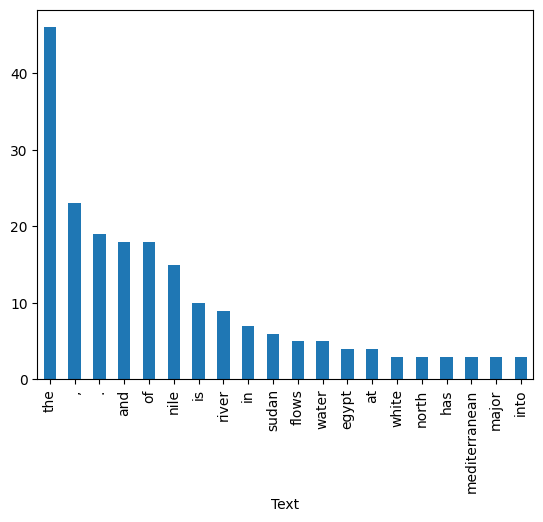

In [16]:

# This time we need to limit the number of words displayed
# otherwise the plot will have a long tail.
# We use head(n=20) to display the top 20 words used.
fig, ax = plt.subplots()
df['Text'].str.lower().value_counts().head(n=20).plot(ax=ax, kind='bar')

Unfortunatly punctuation is some of the highest usage.  If we do not want punctuation to be counted in the word
count, we can exclude it as so:

<Axes: xlabel='Text'>

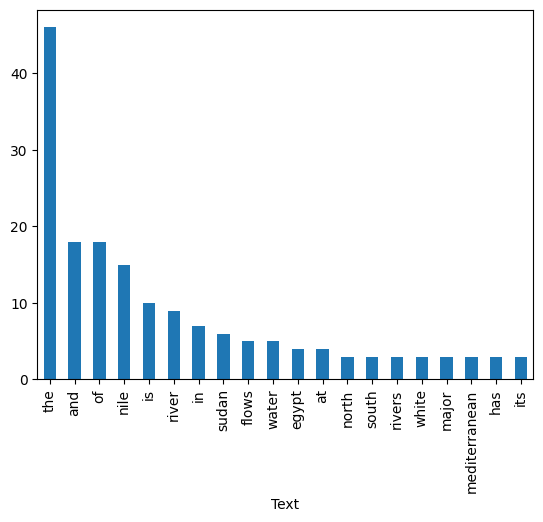

In [17]:
fig, ax = plt.subplots()
df.loc[df['POS']!='PUNCT', 'Text'].str.lower().value_counts().head(n=20).plot(ax=ax, kind='bar')

We can also exclude a set/list of specified words that might not be of interest, e.g. `the`, `and`, etc sometimes called stop words:

<Axes: xlabel='Text'>

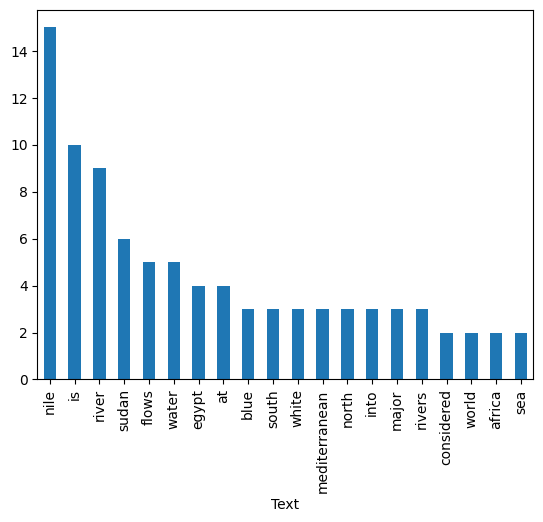

In [18]:
fig, ax = plt.subplots()
excluded_words = set(['the', 'and', 'of', 'in', 'its', 'has'])
df.loc[(df['POS']!='PUNCT') & (~df['Text'].str.lower().isin(excluded_words)), 'Text']\
    .str.lower().value_counts()\
    .head(n=20).plot(ax=ax, kind='bar')

## Comparison of frequency

One useful analysis is to compare the frequency of words apperances in two different texts.  To do this we will need to load in both sets (the new one is the wikipedia article on the river Danube).

We will load in both texts, and pass them through the tagger, then we will save just the words and P.O.S. from each text.

In [19]:
import pandas as pd

text = []
pos = []

with open('Nile.txt') as f:
    contents = f.read()
    output_doc = nlp(contents)
    for token in output_doc:
        text.append(token.text)
        pos.append(token.pos_)

nile_data = pd.DataFrame({'Text': text, 'POS': pos})


text = []
pos = []

danube_file = Path('danube.txt')
if not danube_file.exists():
  print('Cannot found the Danube text file, downloading the file')
  import requests
  response = requests.get("https://raw.githubusercontent.com/UCREL/pymusas_notebook/refs/heads/main/danube.txt")
  with danube_file.open('w', encoding='utf-8') as danube_fp:
    danube_fp.write(response.text)
  print('Danube text file downloaded')

with open('danube.txt') as f:
    contents = f.read()
    output_doc = nlp(contents)
    for token in output_doc:
        text.append(token.text)
        pos.append(token.pos_)

danube_data = pd.DataFrame({'Text': text, 'POS': pos})


Cannot found the Danube text file, downloading the file
Danube text file downloaded


Now we need to clean up the text.  We will place a filter on the dataframe to exclude any row where the POS column is either 'PUNCT' or 'SPACE' to remove white space and punctuation.   Then we will ensure all text is lower case and count how many occurances of each type there are.

In [20]:
nile_data_cleaned = nile_data.loc[(nile_data['POS']!='PUNCT') & (nile_data['POS'] != 'SPACE'), 'Text'].str.lower().value_counts()

danube_data_cleaned = danube_data.loc[(danube_data['POS']!='PUNCT') & (danube_data['POS']!='SPACE'), 'Text'].str.lower().value_counts()

Now we need to combine the datasets and keep only entries where the word occurs in both text.  We then limit this to the top 20 words.

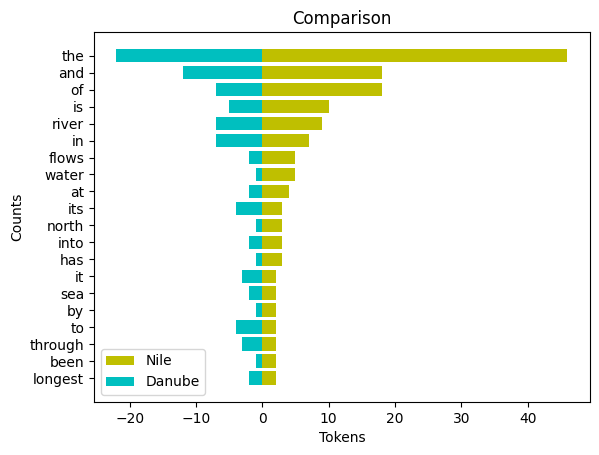

In [21]:
comparison = pd.concat([nile_data_cleaned, danube_data_cleaned], axis=1, join = "inner").head(n=20)

comparison.columns = ['Nile', 'Danube']

import numpy as np
import matplotlib.pyplot as plt

plt.barh(comparison.index[::-1], comparison["Nile"][::-1], align='center', color = 'y', label="Nile")
plt.barh(comparison.index[::-1], -comparison["Danube"][::-1], align='center', color = 'c', label="Danube")
plt.title("Comparison")
plt.ylabel("Counts")
plt.xlabel("Tokens")
plt.legend()
plt.show()




In the comparison bar graph above we can see that the word `of` and `the` appear more often in the Nile text than the Danube text, in the Nile text `of` and `the` appear about 20 and 40 times whereas in the Danube text they appear about 10 and 20 times respectively.

## Keyness value

The comparison above is great to see a quick overview of the difference between the two texts. In this section we want to find which words are "key" words whereby they are used more in one text than the other, to do this we are going to calculate the [log-likelihood](https://ucrel.lancs.ac.uk/llwizard.html) (see [Rayson, P. and Garside, R. (2000)](https://ucrel.lancs.ac.uk/people/paul/publications/rg_acl2000.pdf) on the use of comparing corpora using log-likelihood with the USAS semantic tags) of each word to get the words keyness value. For clarity we are going to use the `Nile` text as the `research/target text` and the `Danube` text as the `reference/normative text`. To **note** that you would normally use a larger corpus/text as the reference text, e.g. BNC or a word frequency list from a large representative corpus.

In [22]:
import math

def keyness(a, b, c, d):
    E1 = c * (a + b) / (c + d)
    E2 = d * (a + b) / (c + d)
    G2 = 2 * ( (a*math.log(a/E1) ) + (b * math.log(b/E2)) )
    return G2

danube_total = danube_data_cleaned.sum()
nile_total = nile_data_cleaned.sum()

under_over = {True: 'Over', False: 'Under'}

comparison["keyness"] = comparison.apply(lambda x: keyness(x["Nile"], x["Danube"], nile_total, danube_total), axis=1)
comparison["use"] = comparison.apply(lambda x: under_over[x["Nile"] > x["Danube"]], axis=1)

Below we can see the tokens ordered by keyness value, if the keyness value is high it indicates the token is either used more or a less in the `research text` (Nile text in this case) than the `reference text` (Danube text in this case) in essence the higher the keyness value of the token use is more different and therefore interesting to investigate. We have added to the table below the column `use` to indicate if the token is `over` used or `under` used.

In [23]:
comparison.sort_values(by='keyness', ascending=False)

,Nile,Danube,keyness,use
Text,,,,
the,46,22,4.157371,Over
of,18,7,2.871796,Over
water,5,1,2.095473,Over
to,2,4,1.198436,Under
is,10,5,0.772092,Over
flows,5,2,0.747467,Over
has,3,1,0.651057,Over
north,3,1,0.651057,Over
it,2,3,0.485455,Under


We can then generate a word cloud of the over used tokens whereby the token text size is based off it's keyness value like so:

In [24]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install wordcloud
from wordcloud import WordCloud

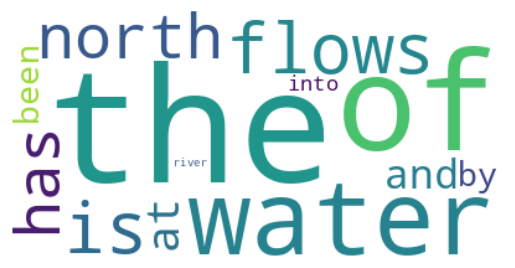

In [25]:
wordcloud = WordCloud(background_color="white").generate_from_frequencies(comparison.loc[comparison['use']=='Over']["keyness"])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()